**Library import**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.subplots as sp
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/drive/MyDrive/MLoptimization/insurance.csv')

**Data analysis and Exploration**

In [3]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,medicalCost
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   int64  
 1   sex          1338 non-null   object 
 2   bmi          1338 non-null   float64
 3   children     1338 non-null   int64  
 4   smoker       1338 non-null   object 
 5   region       1338 non-null   object 
 6   medicalCost  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# checking for missing values
insurance_dataset.isnull().sum()

age            0
sex            0
bmi            0
children       0
smoker         0
region         0
medicalCost    0
dtype: int64

In [7]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,medicalCost
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-8-28228e9c3528>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


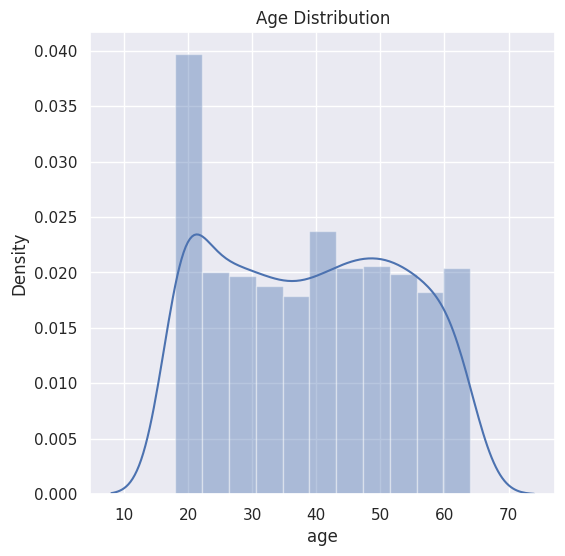

In [8]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

Text(0, 0.5, 'Frequency')

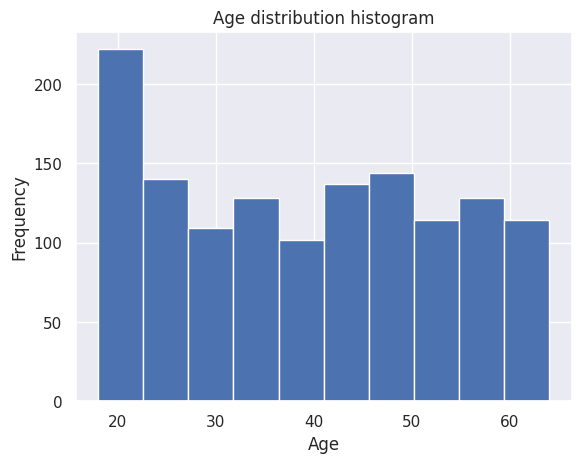

In [9]:
# Histogram
insurance_dataset['age'].plot(kind='hist')
plt.title('Age distribution histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')

<ipython-input-10-285f401e37bb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=insurance_dataset, palette='hls')


Text(0.5, 1.0, 'Sex Distribution')

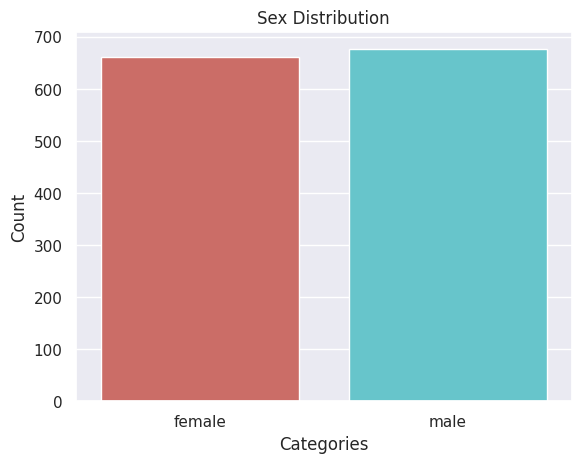

In [10]:
# count plot
sns.countplot(x='sex', data=insurance_dataset, palette='hls')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Sex Distribution')

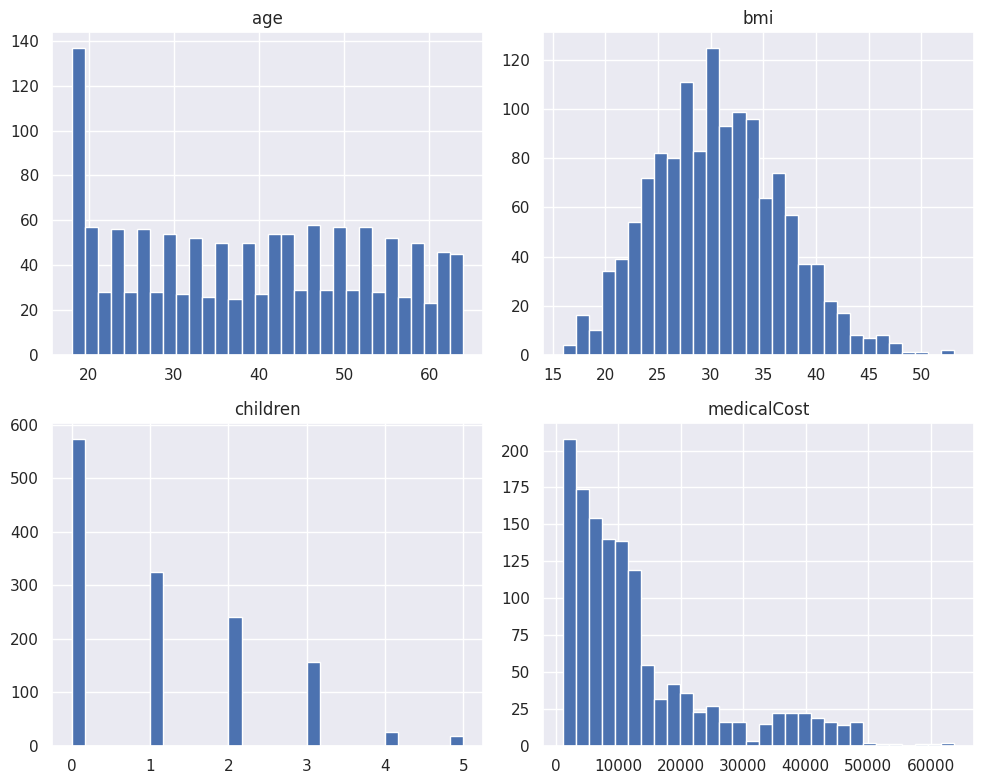

In [11]:
# Histograms for numerical columns
insurance_dataset.hist(bins=30, figsize=(10, 8))
plt.tight_layout()
plt.show()

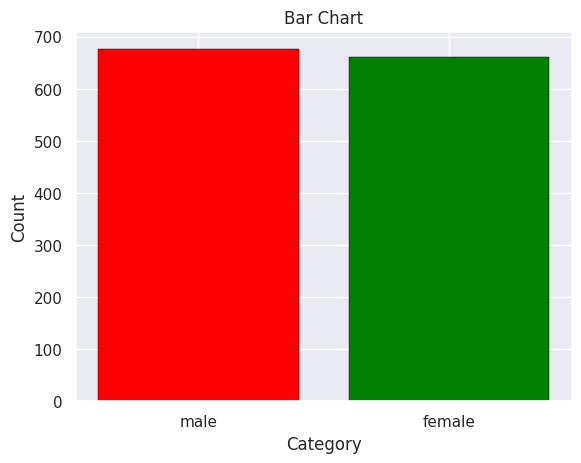

In [12]:
# Bar Chart
categories = ['male', 'female']
counts = insurance_dataset['sex'].value_counts()

plt.bar(categories, counts,
        align='center',          # Alignment of the bars ('center', 'edge')
        width=0.8,               # Width of the bars
        color=['red', 'green'],  # Color of the bars
        edgecolor='black',       # Color of the bar edges
        linewidth=0.3,           # Width of the bar edges)
)
plt.title('Bar Chart')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

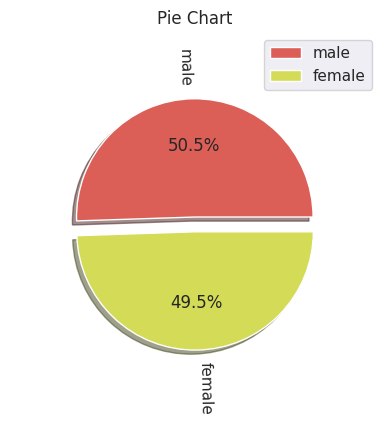

In [14]:
# pie chart
plt.pie(counts,
        labels=categories,
        colors=sns.color_palette('hls'),
        explode=[0, 0.1],
        autopct='%1.1f%%',
        shadow=True,
        radius=0.8,
        counterclock=True,
        frame=False,
        rotatelabels=True,
       )
plt.title('Pie Chart')
plt.legend()
plt.show()

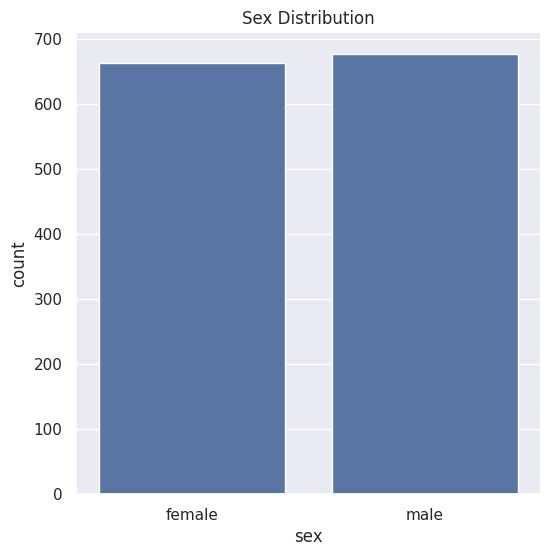

In [15]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [16]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [17]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [18]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [19]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [20]:
insurance_dataset['age'].value_counts()

age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64

<ipython-input-21-9f520b4cf505>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoker', data=insurance_dataset, palette='hls')


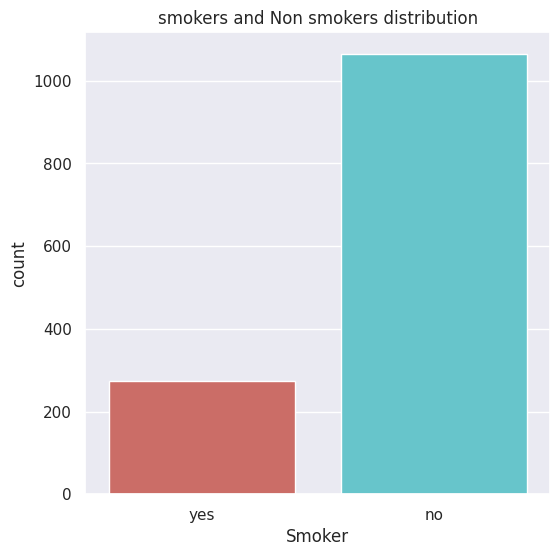

In [21]:
# We will use Subplot
plt.figure(figsize=(6, 6))  # Create a figure with a specified size

# Subplot 1: Countplot for 'sex'
#plt.subplot(1, 3, 1)  # Create a subplot with 1 row, 3 columns, and set the current axis to the first subplot
#sns.countplot(x='sex', data=insurance_dataset, palette='hls')
#plt.xlabel('Gender')

# Subplot 2: Countplot for 'smoker'
#plt.subplot(1, 3, 1)
sns.countplot(x='smoker', data=insurance_dataset, palette='hls')
plt.xlabel('Smoker')


plt.title('smokers and Non smokers distribution')  # Add a centered title above all subplots
plt.show()


<ipython-input-22-5975c8641d30>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=insurance_dataset, palette='hls')


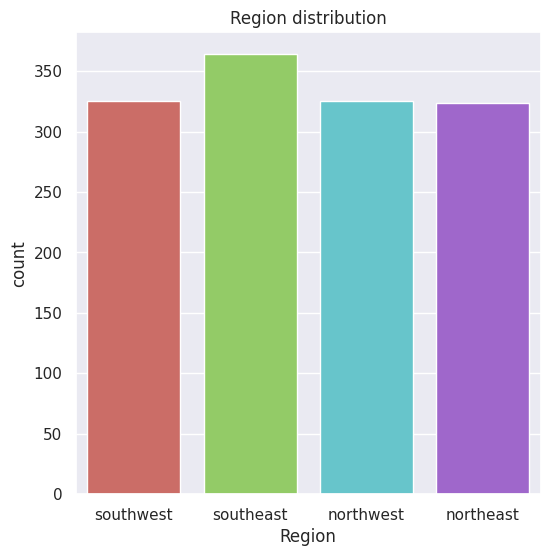

In [22]:
plt.figure(figsize=(6, 6))  # Create a figure with a specified size
# Subplot 3: Countplot for 'region'
#plt.subplot(1, 3, 1)
sns.countplot(x='region', data=insurance_dataset, palette='hls')
plt.xlabel('Region')
plt.title('Region distribution')  # Add a centered title above all subplots
plt.show()


<ipython-input-23-81b69896b0d5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


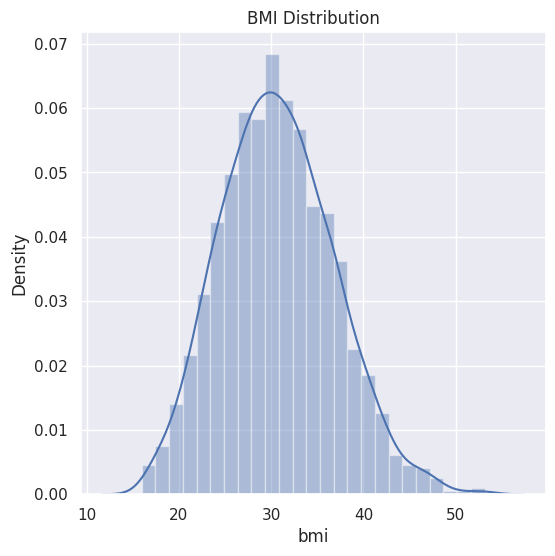

In [23]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

<ipython-input-24-39d1a863f586>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children', data=insurance_dataset, palette='hls')


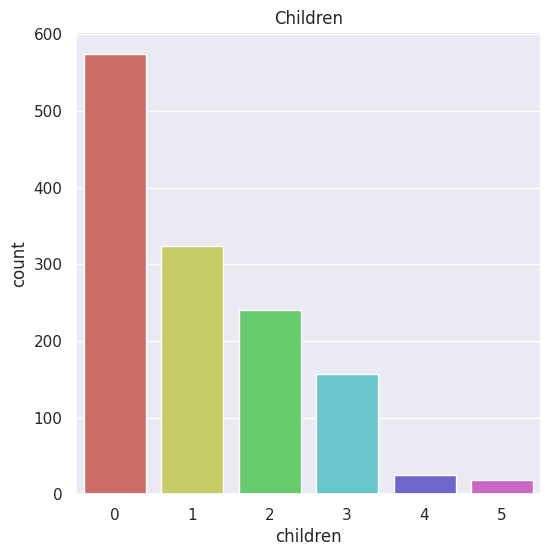

In [24]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset, palette='hls')
plt.title('Children')
plt.show()

In [25]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

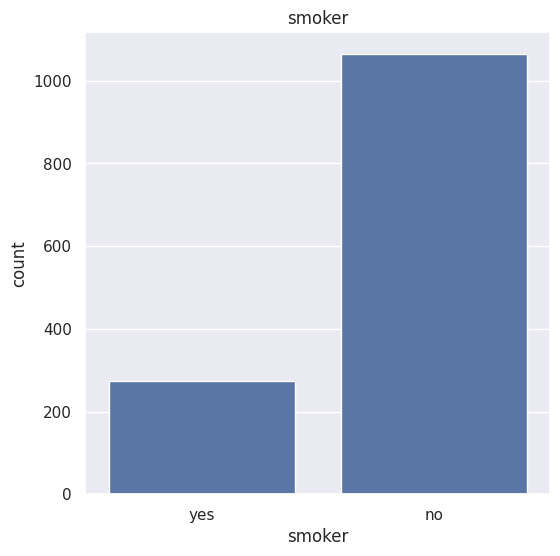

In [26]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [27]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

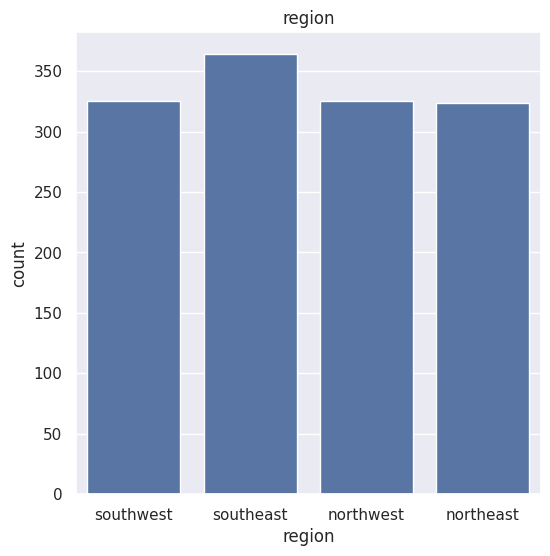

In [28]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [29]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<ipython-input-30-fc82d1d8546e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['medicalCost'])


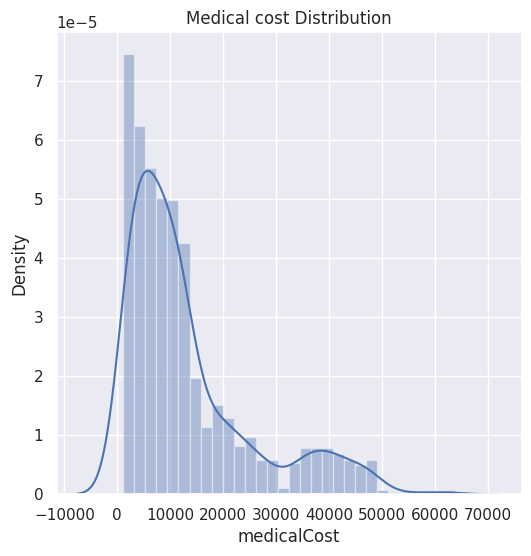

In [30]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['medicalCost'])
plt.title('Medical cost Distribution')
plt.show()

Dataset preprocessing Label encoding

In [31]:
# encoding sex column
insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

3 # encoding 'smoker' column
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

In [32]:
#Correlation
correlation = insurance_dataset.corr()

In [33]:


# Extract the correlation of medical costs with other variables
medical_cost_corr = correlation['medicalCost'].sort_values(ascending=False)

print(medical_cost_corr)

medicalCost    1.000000
age            0.299008
bmi            0.198341
children       0.067998
region        -0.056993
sex           -0.057292
smoker        -0.787251
Name: medicalCost, dtype: float64


In [34]:
correlation

,age,sex,bmi,children,smoker,region,medicalCost
age,1.000000,0.020856,0.109272,0.042469,0.025019,0.005212,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,0.076185,0.016121,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,-0.003750,-0.261829,0.198341
children,0.042469,-0.017163,0.012759,1.000000,-0.007673,0.019257,0.067998
smoker,0.025019,0.076185,-0.003750,-0.007673,1.000000,0.053930,-0.787251
region,0.005212,0.016121,-0.261829,0.019257,0.053930,1.000000,-0.056993
medicalCost,0.299008,-0.057292,0.198341,0.067998,-0.787251,-0.056993,1.000000


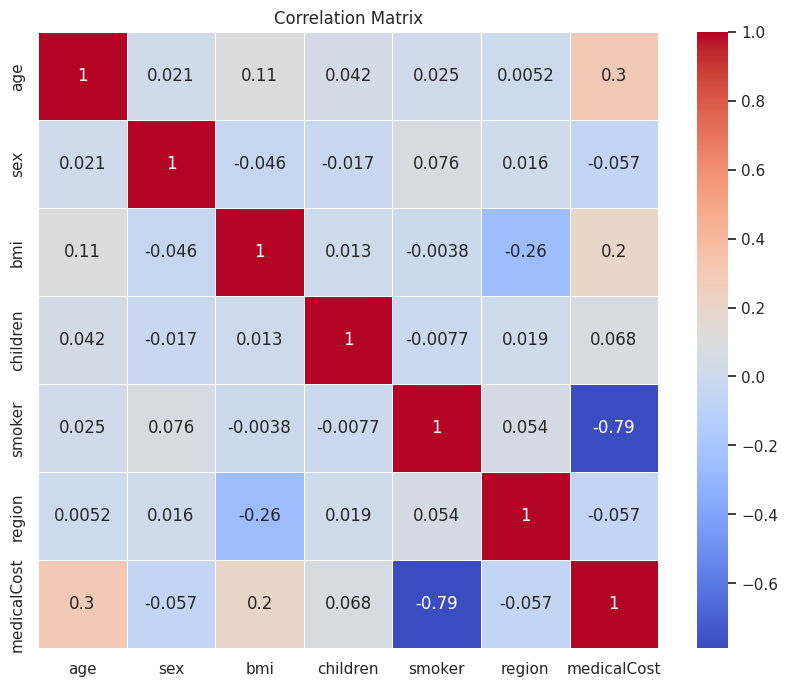

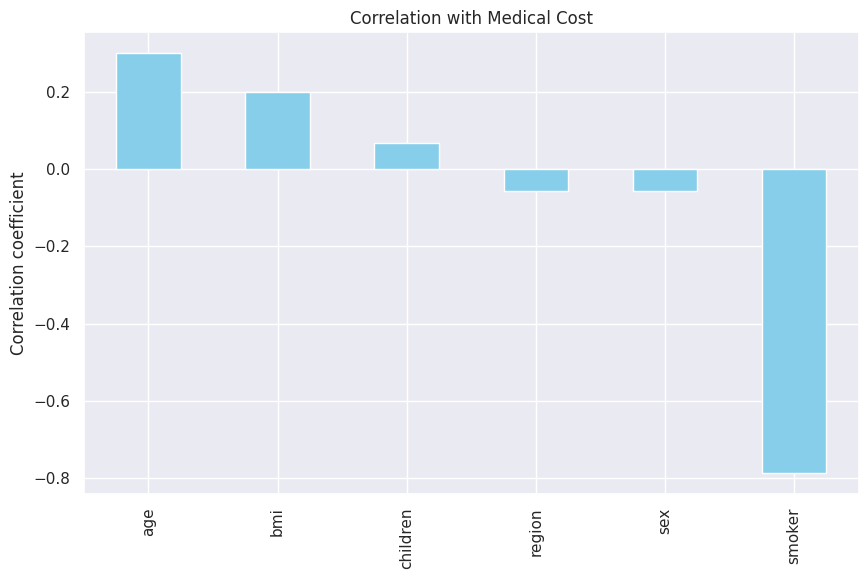

In [35]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Extract the correlation of medical costs with other variables
medical_cost_corr = correlation['medicalCost'].sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(10, 6))
medical_cost_corr.drop('medicalCost').plot(kind='bar', color='skyblue')
plt.title('Correlation with Medical Cost')
plt.ylabel('Correlation coefficient')
plt.show()

<ipython-input-36-0fc31b5c0740>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=medical_cost_corr.values, y=medical_cost_corr.index, palette='coolwarm')


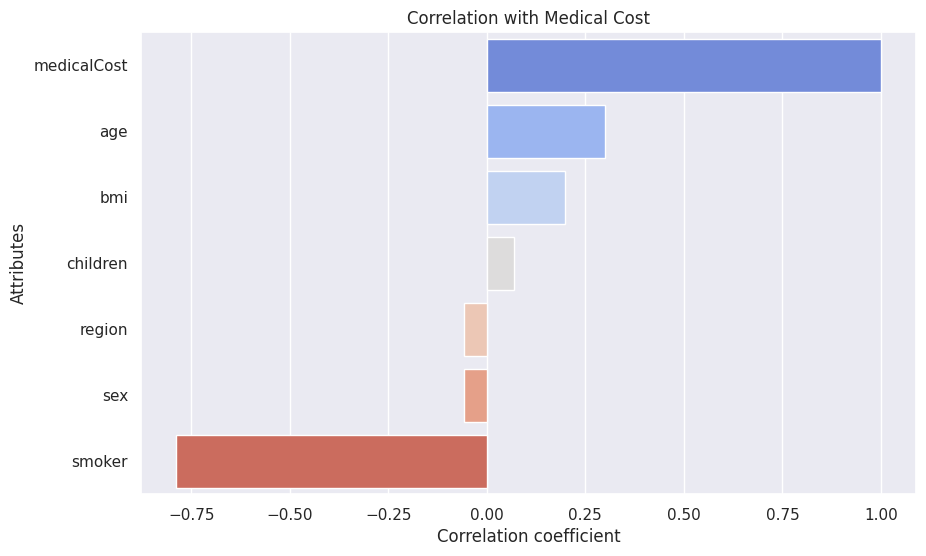

In [36]:
# Extract the correlation of medical costs with other variables
medical_cost_corr = correlation['medicalCost'].sort_values(ascending=False)

# Plot the horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=medical_cost_corr.values, y=medical_cost_corr.index, palette='coolwarm')
plt.title('Correlation with Medical Cost')
plt.xlabel('Correlation coefficient')
plt.ylabel('Attributes')
plt.show()

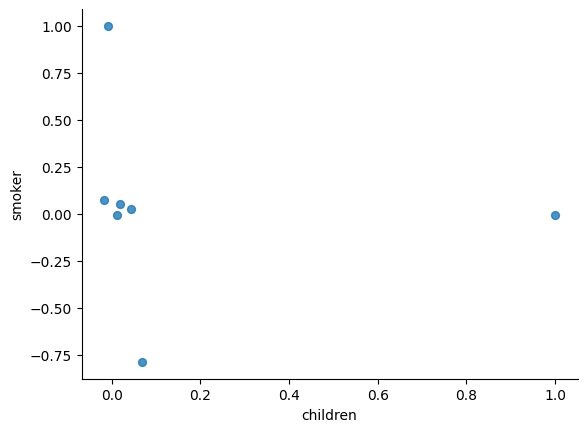

In [ ]:
# @title children vs smoker

from matplotlib import pyplot as plt
correlation.plot(kind='scatter', x='children', y='smoker', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

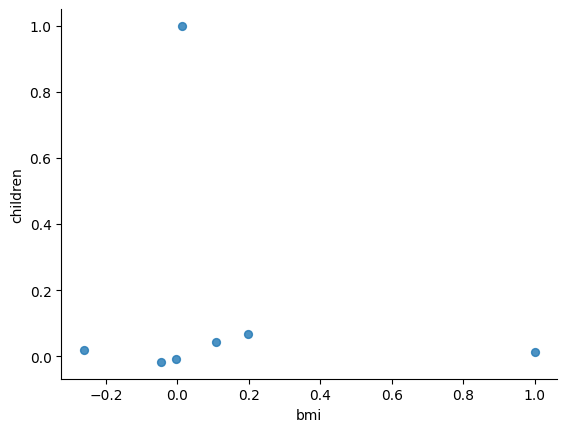

In [ ]:
# @title bmi vs children

from matplotlib import pyplot as plt
correlation.plot(kind='scatter', x='bmi', y='children', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

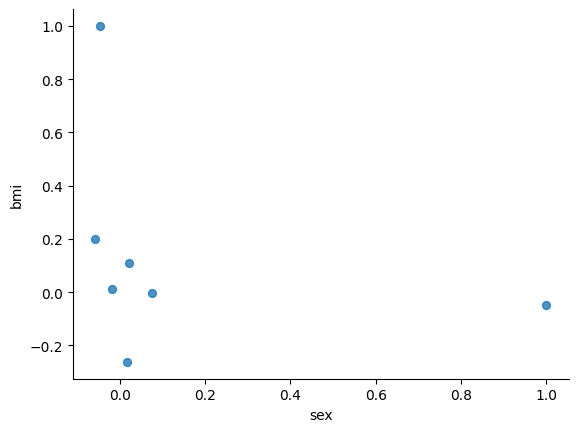

In [ ]:
# @title sex vs bmi

from matplotlib import pyplot as plt
correlation.plot(kind='scatter', x='sex', y='bmi', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

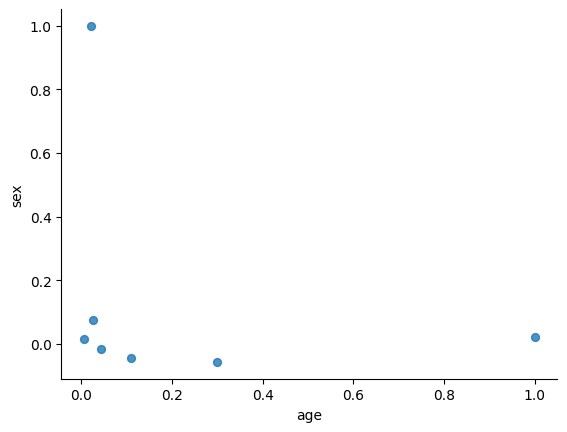

In [ ]:
# @title age vs sex

from matplotlib import pyplot as plt
correlation.plot(kind='scatter', x='age', y='sex', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

d.Use the correlation analysis to select 3 best predictors and build a simple linear regression
model based on each of the predictors.

In [37]:
# Define the target variable
target_variable = 'medicalCost'

# Get the correlation of each predictor with the target variable and sort them
correlations = correlation[target_variable].drop(target_variable).abs().sort_values(ascending=False)

# Select the top 3 predictors
top_3_predictors = correlations.head(3).index.tolist()

print("Top 3 predictors:", top_3_predictors)


Top 3 predictors: ['smoker', 'age', 'bmi']



Model using smoker as predictor:
Mean Squared Error: 55720715.95418544
R^2 Score: 0.6197648148218988


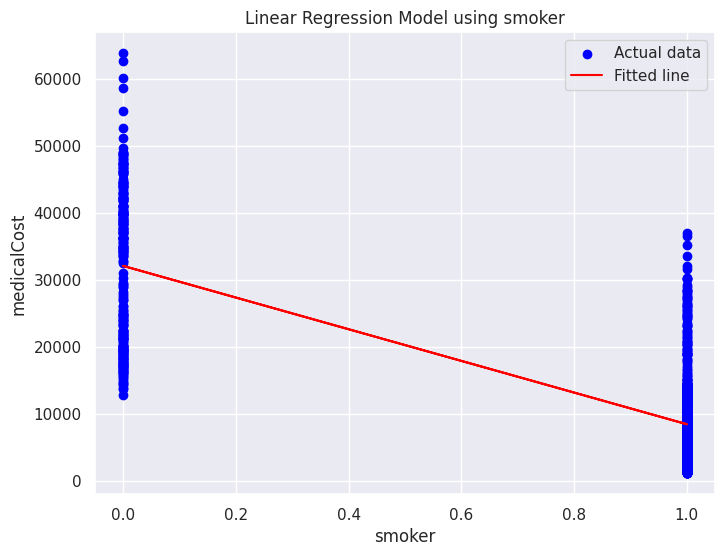


Model using age as predictor:
Mean Squared Error: 133440978.61376347
R^2 Score: 0.08940589967885804


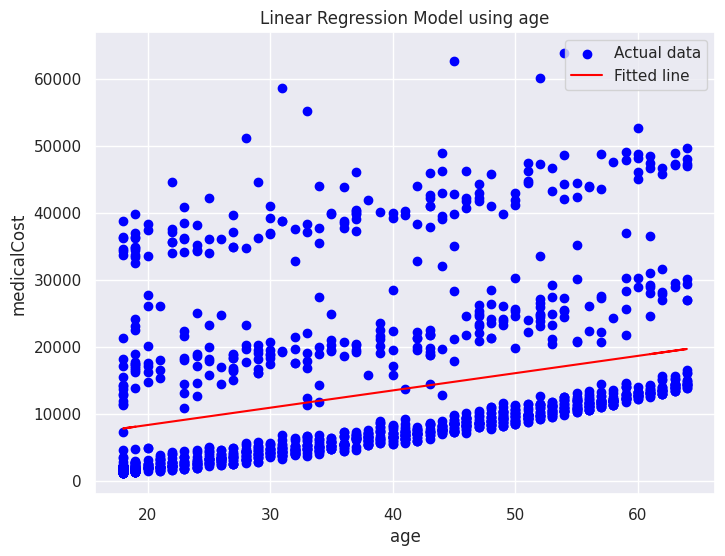


Model using bmi as predictor:
Mean Squared Error: 140777900.09850758
R^2 Score: 0.03933913991786264


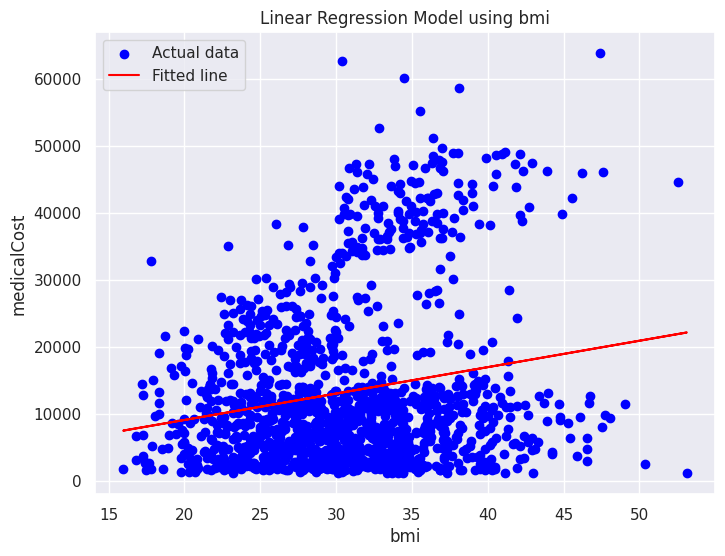

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Dictionary to store model details
models = {}

# Build and evaluate models for each of the top 3 predictors
for predictor in top_3_predictors:
    X = insurance_dataset[[predictor]]
    y = insurance_dataset[target_variable]

    # Initialize and fit the model
    model = LinearRegression()
    model.fit(X, y)

    # Make predictions
    y_pred = model.predict(X)

    # Store model details
    models[predictor] = {
        'model': model,
        'predictions': y_pred,
        'mse': mean_squared_error(y, y_pred),
        'r2': r2_score(y, y_pred)
    }

    # Evaluate the model
    print(f"\nModel using {predictor} as predictor:")
    print(f"Mean Squared Error: {models[predictor]['mse']}")
    print(f"R^2 Score: {models[predictor]['r2']}")

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(X, y, color='blue', label='Actual data')
    plt.plot(X, y_pred, color='red', label='Fitted line')
    plt.xlabel(predictor)
    plt.ylabel(target_variable)
    plt.title(f'Linear Regression Model using {predictor}')
    plt.legend()
    plt.show()


In [39]:
X = insurance_dataset.drop(columns='medicalCost', axis=1)
Y = insurance_dataset['medicalCost']

In [40]:
print(X)


      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [41]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: medicalCost, Length: 1338, dtype: float64


Linear Regression model implementation on dataset

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [44]:
# loading the Linear Regression model
regressor = LinearRegression()

In [45]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [46]:
# prediction on training data
training_data_prediction =regressor.predict(X_train)

In [47]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751505643411174


In [48]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [49]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7447273869684076


In [51]:
#example on test data
input_data = (31,1,25.74,0,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3760.0805765]
The insurance cost is USD  3760.080576496057


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Top 3 predictors: ['smoker', 'age', 'bmi']

Model using smoker as predictor:
Mean Squared Error: 55720715.95418544
R^2 Score: 0.6197648148218988


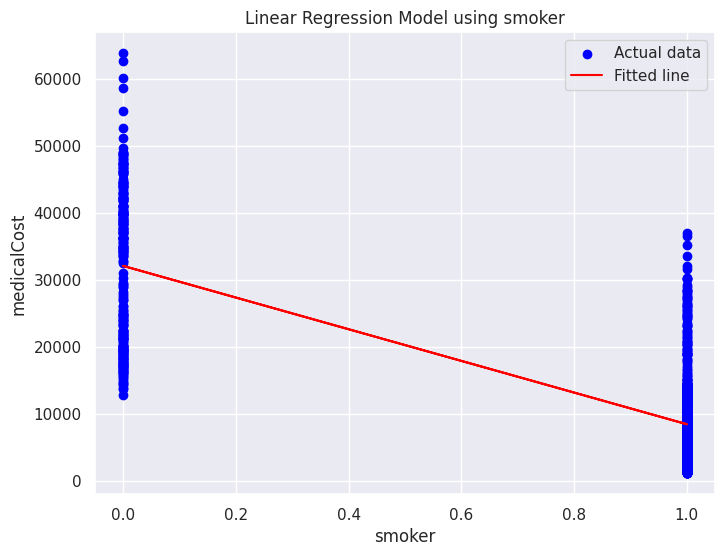


Model using age as predictor:
Mean Squared Error: 133440978.61376347
R^2 Score: 0.08940589967885804


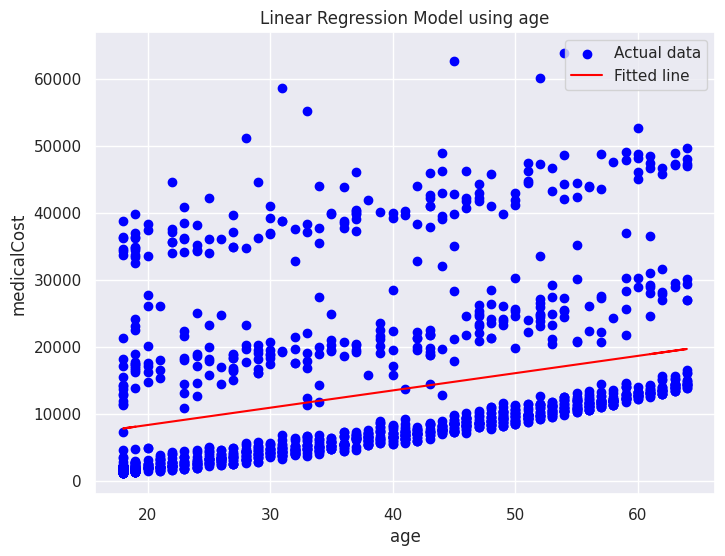


Model using bmi as predictor:
Mean Squared Error: 140777900.09850758
R^2 Score: 0.03933913991786264


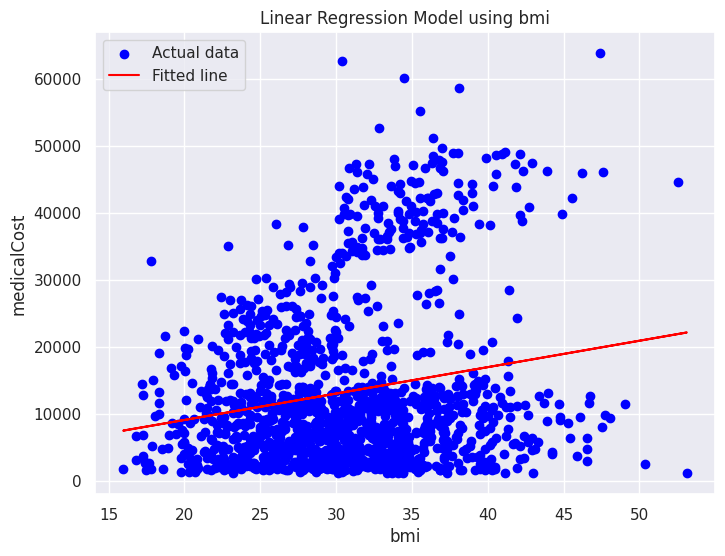

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



# Step 2: Compute the correlation matrix
correlation_matrix = insurance_dataset.corr()

# Step 3: Select the top 3 predictors based on correlation with the target variable
target_variable = 'medicalCost'  # Replace with your actual target variable name
correlations = correlation_matrix[target_variable].drop(target_variable).abs().sort_values(ascending=False)
top_3_predictors = correlations.head(3).index.tolist()

print("Top 3 predictors:", top_3_predictors)

# Step 4: Build simple linear regression models for each predictor
models = {}
for predictor in top_3_predictors:
    X = insurance_dataset[[predictor]]
    y = insurance_dataset[target_variable]

    model = LinearRegression()
    model.fit(X, y)

    y_pred = model.predict(X)

    # Store model details
    models[predictor] = {
        'model': model,
        'predictions': y_pred,
        'mse': mean_squared_error(y, y_pred),
        'r2': r2_score(y, y_pred)
    }

# Step 5: Evaluate the models
for predictor, details in models.items():
    print(f"\nModel using {predictor} as predictor:")
    print(f"Mean Squared Error: {details['mse']}")
    print(f"R^2 Score: {details['r2']}")

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(insurance_dataset[predictor], insurance_dataset[target_variable], color='blue', label='Actual data')
    plt.plot(insurance_dataset[predictor], details['predictions'], color='red', label='Fitted line')
    plt.xlabel(predictor)
    plt.ylabel(target_variable)
    plt.title(f'Linear Regression Model using {predictor}')
    plt.legend()
    plt.show()


Model 1: Using the three best predictors (age, bmi, smoker).

In [52]:
# Define the dependent variable (target)
y = insurance_dataset['medicalCost']

# Define the independent variables (predictors)
X_all = insurance_dataset.drop(columns=['medicalCost'])
X_best = insurance_dataset[['age', 'bmi', 'smoker']]

# Split the data into training and testing sets for both models
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y, test_size=0.2, random_state=42)
X_train_best, X_test_best, y_train_best, y_test_best = train_test_split(X_best, y, test_size=0.2, random_state=42)


In [53]:
# Initialize the linear regression model
model_all = LinearRegression()
model_best = LinearRegression()

# Fit the models
model_all.fit(X_train_all, y_train_all)
model_best.fit(X_train_best, y_train_best)

# Make predictions
y_pred_all = model_all.predict(X_test_all)
y_pred_best = model_best.predict(X_test_best)

# Evaluate the models
mse_all = mean_squared_error(y_test_all, y_pred_all)
mse_best = mean_squared_error(y_test_best, y_pred_best)
r2_all = r2_score(y_test_all, y_pred_all)
r2_best = r2_score(y_test_best, y_pred_best)

# Print the evaluation metrics
print(f"Model with all predictors:\nMSE: {mse_all}\nR-squared: {r2_all}\n")
print(f"Model with best predictors:\nMSE: {mse_best}\nR-squared: {r2_best}\n")


Model with all predictors:
MSE: 33685623.354144424
R-squared: 0.783021587162344

Model with best predictors:
MSE: 34512843.88022789
R-squared: 0.7776932310583375

